<a href="https://colab.research.google.com/github/ganuwoahh/tdlta/blob/main/Week4_LSTM_GRU_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LSTM vs GRU

LSTM and GRU are both forms of RNNs that incorporate some sort of memory functionality to combat Vanishing Gradient.

LSTM stands for Long Short Term Memory. It has 3 gates, input, forget & output, that decide what information is kept, forgotten and outputted respectively.

It consists of two main states. The cell state and the hidden state. The cell state is the memory and has the information gathered by the previous cell. The hidden state is the current state of the cell.

GRU stands for Gated Recurrent Memory.



The problem of Vanishing Gradients is solved by using gates like this. This is because they control the gradients during the forward and backward passes. They can vanish the gradients if they think it doesn't contribute anything relevant. Moreover, they can amplify the gradient if it seems important.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from transformers import PreTrainedTokenizerFast
import json
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('train_data.csv')
df.head()

,sentence,sentiment
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1523975 entries, 0 to 1523974
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentence   1523975 non-null  object
 1   sentiment  1523975 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 23.3+ MB


In [5]:
with open('vocab.json', 'r') as f:
    tokenizer_config = json.load(f)

tokenizer = PreTrainedTokenizerFast(tokenizer_file="/content/vocab.json")

In [6]:
#definitions
max_features = 30000
maxlen = 50
embedding_dims = 128
batch_size = 64
epochs = 5

In [7]:
#add preprocessing if required. this particular dataset has it done for us

In [8]:
def batch_tokenize(sentences, batch_size=5000):
    input_ids = []
    for i in tqdm(range(0, len(sentences), batch_size)):
        batch = sentences[i : i + batch_size]
        encodings = tokenizer(batch, padding=False, truncation=True, max_length=maxlen)
        input_ids.extend(encodings['input_ids'])
    return np.array(pad_sequences(input_ids, maxlen=maxlen, padding='post'))

X = batch_tokenize(df['sentence'].tolist(), batch_size=5000)
y = df['sentiment'].values

100%|██████████| 305/305 [01:33<00:00,  3.26it/s]


In [9]:
def create_lstm_model():
    model = Sequential([
        Embedding(max_features, embedding_dims, input_length=maxlen),
        LSTM(64, return_sequences=True),
        LSTM(32),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=['accuracy']
    )
    return model

In [26]:
def create_gru_model():
    model = Sequential([
        Embedding(max_features, embedding_dims, input_length=maxlen),
        GRU(64, return_sequences=True),
        GRU(32),
        Dropout(0.2),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=['accuracy']
    )
    return model

In [11]:
def train_and_evaluate(model, X_train, y_train, X_val, y_val, model_name):
    print(f"\nTraining {model_name}...")
    history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(X_val, y_val),
        verbose=1
    )
    return history

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
lstm_model = create_lstm_model()
lstm_history = train_and_evaluate(lstm_model, X_train, y_train, X_val, y_val, "LSTM")


Training LSTM...
Epoch 1/5
19050/19050 ━━━━━━━━━━━━━━━━━━━━ 232s 12ms/step - accuracy: 0.5054 - loss: 0.6922 - val_accuracy: 0.5023 - val_loss: 0.6931
Epoch 2/5
19050/19050 ━━━━━━━━━━━━━━━━━━━━ 228s 12ms/step - accuracy: 0.6213 - loss: 0.5952 - val_accuracy: 0.8194 - val_loss: 0.3984
Epoch 3/5
19050/19050 ━━━━━━━━━━━━━━━━━━━━ 227s 12ms/step - accuracy: 0.8306 - loss: 0.3788 - val_accuracy: 0.8267 - val_loss: 0.3860
Epoch 4/5
19050/19050 ━━━━━━━━━━━━━━━━━━━━ 226s 12ms/step - accuracy: 0.8485 - loss: 0.3445 - val_accuracy: 0.8268 - val_loss: 0.3866
Epoch 5/5
19050/19050 ━━━━━━━━━━━━━━━━━━━━ 265s 12ms/step - accuracy: 0.8648 - loss: 0.3131 - val_accuracy: 0.8234 - val_loss: 0.3948


In [27]:
gru_model = create_gru_model()
gru_history = train_and_evaluate(gru_model, X_train, y_train, X_val, y_val, "GRU")


Training GRU...
Epoch 1/5
19050/19050 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5015 - loss: 0.6932

KeyboardInterrupt: 

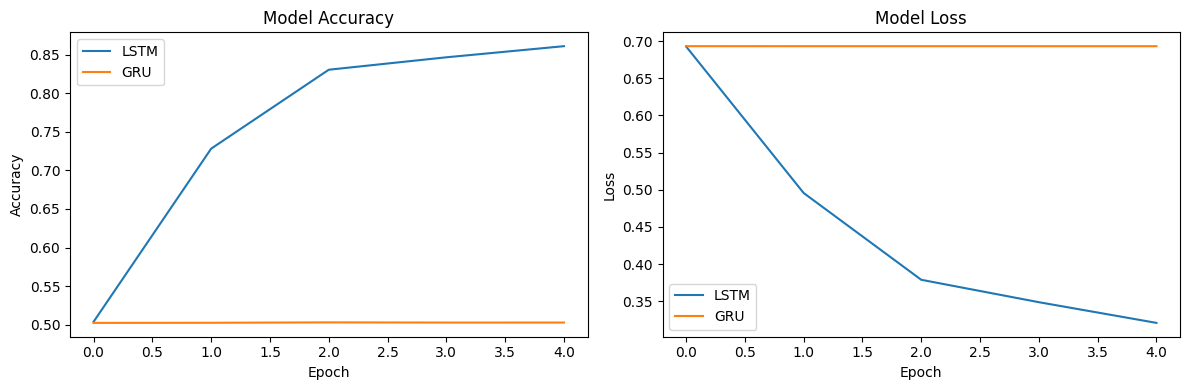

In [15]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='LSTM')
plt.plot(gru_history.history['accuracy'], label='GRU')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(lstm_history.history['loss'], label='LSTM')
plt.plot(gru_history.history['loss'], label='GRU')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()